In [1]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/SSC/"
path2="/mnt/indexer-build/migrated_data/casper_data/curated/SSC/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [4]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
all_files2 = glob.glob(path2 + "/*/*.csv")

li2 = []

for filename1 in all_files2:
    df2 = pd.read_csv(filename1, index_col=None, header=0)
    li2.append(df2)

frame2 = pd.concat(li2, axis=0, ignore_index=True)

In [64]:
# frame = pd.merge(frame2, frame, on=["time_week"])

In [6]:
frame2["year"]=frame2.time_week.apply(extractorYear)
frame2["week"]=frame2.time_week.apply(extractorWeek)
final3 = frame2.sort_values(by=['year','week'])

In [7]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [9]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]
extra2 = final3[((final3.year == 2018) & (final3.week < 26)) | ((final3.year == 2022) & (final3.week > 34))]

In [10]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df2 = pd.merge(final3, extra2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [15]:
df

,max_count,time_week,Total_Vertices,year,week,date
1,1,201826,34,2018,26,2018-07-02
2,30,201827,1738,2018,27,2018-07-09
3,12,201828,1205,2018,28,2018-07-16
4,6,201829,1337,2018,29,2018-07-23
5,3,201830,697,2018,30,2018-07-30
...,...,...,...,...,...,...
215,2421,202230,135405,2022,30,2022-07-30
216,2005,202231,130993,2022,31,2022-08-06
217,1720,202232,129608,2022,32,2022-08-13
218,2207,202233,131052,2022,33,2022-08-20


In [16]:
# df["entity_ratio"] = (df.max_count_entity / df.Total_Vertices_x) * 100
df["SSC_ratio_tezos"] = (df.max_count / df.Total_Vertices) * 100
df2["SSC_ratio_casper"] = (df2.max_count / df2.Total_Vertices) * 100

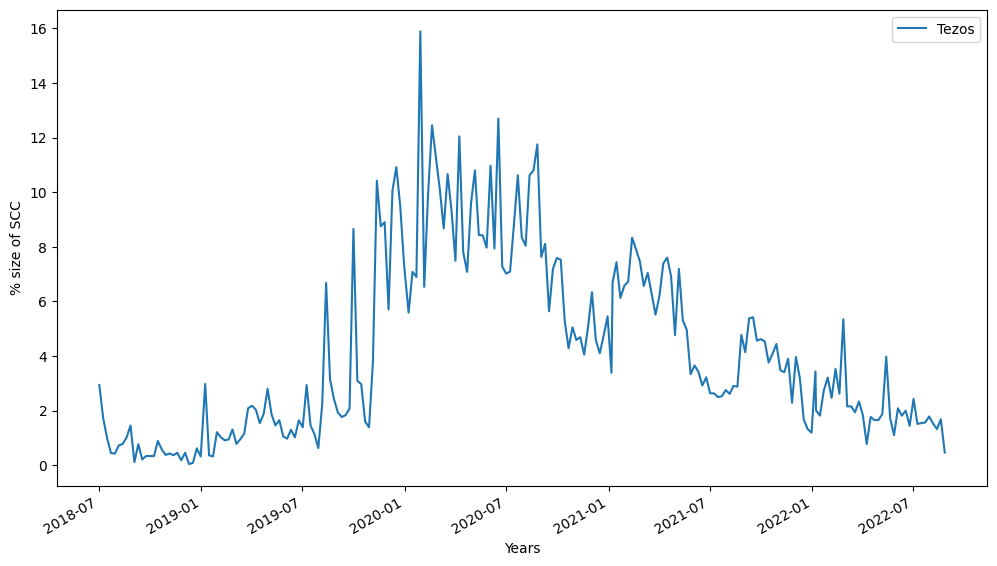

In [20]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')
df2['date'] = pd.to_datetime(df2.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df2.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='SSC_ratio_tezos', ax=ax, figsize=(12,7))
# df2.plot(x='date', y='SSC_ratio_casper', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('% size of SCC')
ax.legend(['Tezos'])

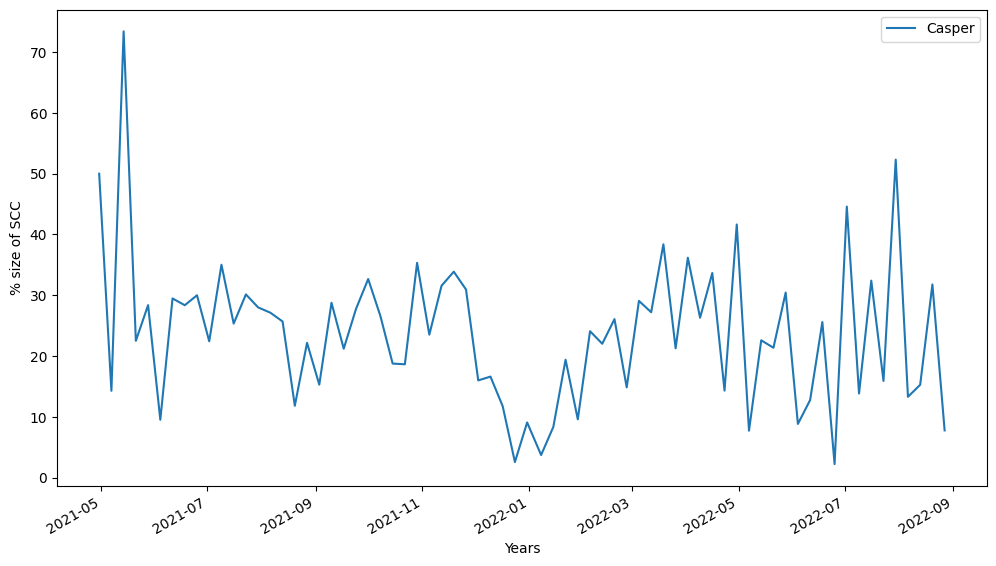

In [21]:
# Plot
fig, ax = plt.subplots()
# df.plot(x='date', y='SSC_ratio_tezos', ax=ax, figsize=(12,7))
df2.plot(x='date', y='SSC_ratio_casper', ax=ax,  figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('% size of SCC')
ax.legend(['Casper'])

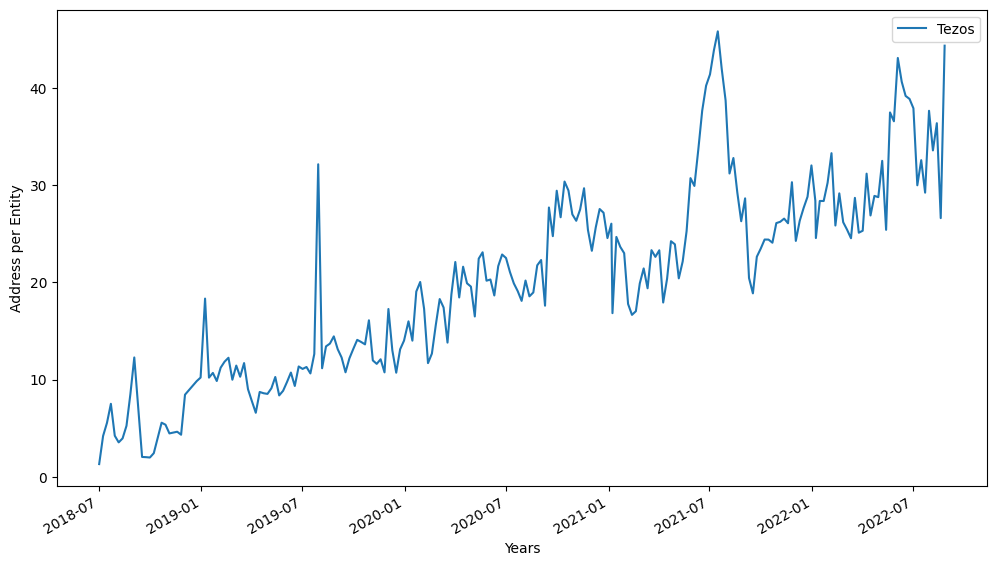

In [26]:
# Plot
fig2, ax2 = plt.subplots()
df.plot(x='date', y='avg_address_per_entity', ax=ax2, figsize=(12,7))
ax2.set_xlabel('Years')
ax2.set_ylabel('Address per Entity')
ax2.legend(['Tezos'])